### 绘制栅格地图

In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import shapefile
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import rasterio
import os
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties


In [2]:
def basemask(cs, ax, map, shpfile):
    sf = shapefile.Reader(shpfile)
    vertices = []
    codes = []
    for shape_rec in sf.shapeRecords():
        if shape_rec.record[0] >= 0:  
            pts = shape_rec.shape.points
            prt = list(shape_rec.shape.parts) + [len(pts)]
            for i in range(len(prt) - 1):
                for j in range(prt[i], prt[i+1]):
                    vertices.append(map(pts[j][0], pts[j][1]))
                codes += [Path.MOVETO]
                codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
                codes += [Path.CLOSEPOLY]
            clip = Path(vertices, codes)
            clip = PathPatch(clip, transform = ax.transData)
#     for contour in cs.collections:
#         contour.set_clip_path(clip) 
    cs.set_clip_path(clip) #我的shp文件只包含一个区域，包含多个区域就用上面
            
def makedegreelabel(degreelist):
    labels = [str(x)+u'°E' for x in degreelist ]
    return labels

In [3]:
#LR
ds_LR = xr.open_rasterio('C:/Users/2019/Desktop/1a/data/LR_result_wgs84.tif')
LR_data = ds_LR.data

In [23]:
#RF
ds_RF = xr.open_rasterio('C:/Users/2019/Desktop/1a/data/RF_result_wgs84.tif')
RF_data = ds_RF.data


In [25]:
#catboost
ds_catboost = xr.open_rasterio('C:/Users/2019/Desktop/1a/data/catboost_result_wgs84.tif')


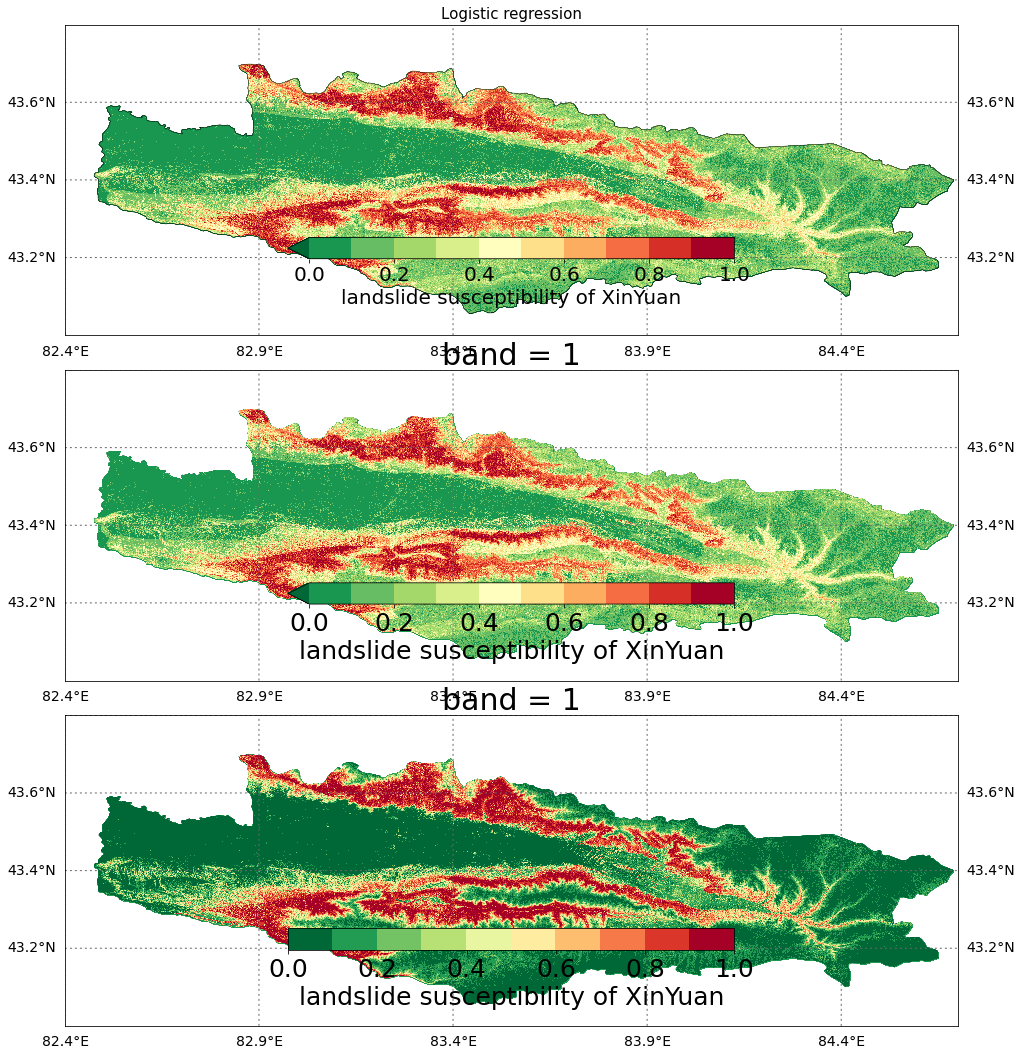

In [29]:
#设置宋体
ZHfont = matplotlib.font_manager.FontProperties(fname='/Users/2019/Documents/fonts/SimSun.ttf')

#[west ,east,south,north]
m = Basemap(llcrnrlon=82.4,
           llcrnrlat=43.0,
           urcrnrlon=84.7,
           urcrnrlat=43.8,
           resolution=None,
           projection='cyl')
#颜色条
cbar_kwargs={
    'orientation':'horizontal',
#     'orientation':'vertical',
    'label':'landslide susceptibility of XinYuan',
    'shrink':0.5,
    'ticks':np.arange(0.0,1.1,0.2),
#     'pad':-0.45,#控制颜色条和图的距离
    'shrink':0.5,
#     "spacing": "uniform"
}


#设置绘图字体
plt.rcParams.update({'font.size':20})
fig1 = plt.figure(figsize=[16,18])#设置图片大小
ax1 = fig1.add_subplot(311)

os.chdir('C:/Users/2019/Desktop/1a/data')
levels = np.arange(0,1.1,0.1)
cs1 = ds_LR.plot(ax=ax1,levels=levels,cbar_kwargs=cbar_kwargs, cmap='RdYlGn_r')#RdYlGn
m.readshapefile('xinyuan/xinyuan_wgs84','xinyuan_wgs84')
basemask(cs1, ax1, m, 'xinyuan/xinyuan_wgs84') 

parallels = np.arange(43.2,44+1,0.2)
m.drawparallels(parallels,labels=[True,True,True,True],color='dimgrey',dashes=[2, 3],fontsize= 14)  # ha= 'right'
meridians = np.arange(82.4,85+1,0.5)
m.drawmeridians(meridians,labels=[True,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 14)

plt.ylabel('')
plt.xlabel('')

plt.rcParams.update({'font.size':25})
ax1.set_title(u'Logistic regression',color='black',fontsize= 15)

######################
# fig2 = plt.figure(figsize=[16,18])
ax2 = fig1.add_subplot(312)
cs2 = ds_RF.plot(ax=ax2,levels=levels,cbar_kwargs=cbar_kwargs, cmap='RdYlGn_r')#RdYlGn

basemask(cs2, ax2, m, 'xinyuan/xinyuan_wgs84') 
parallels = np.arange(43.2,44+1,0.2)
m.drawparallels(parallels,labels=[True,True,True,True],color='dimgrey',dashes=[2, 3],fontsize= 14)  # ha= 'right'
meridians = np.arange(82.4,85+1,0.5)
m.drawmeridians(meridians,labels=[True,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 14)
plt.ylabel('')
plt.xlabel('')
plt.rcParams.update({'font.size':25})
# ax2.set_title(u'Random forest',color='black',fontsize= 15)

###################
# fig3 = plt.figure(figsize=[16,18])
ax3 = fig1.add_subplot(313)
cs3 = ds_catboost.plot(ax=ax3,levels=levels,cbar_kwargs=cbar_kwargs, cmap='RdYlGn_r')#RdYlGn
basemask(cs3, ax3, m, 'xinyuan/xinyuan_wgs84') 
parallels = np.arange(43.2,44+1,0.2)
m.drawparallels(parallels,labels=[True,True,True,True],color='dimgrey',dashes=[2, 3],fontsize= 14)  # ha= 'right'
meridians = np.arange(82.4,85+1,0.5)
m.drawmeridians(meridians,labels=[True,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 14)
plt.ylabel('')
plt.xlabel('')
# ax3.set_title(u'CatBoost',color='black',fontsize= 15)

# # Save & Show figure
# plt.savefig("LR_result.tif", dpi=300, bbox_inches='tight')
plt.show()